In [ ]:
### Support Vector Machine
    It is a supervised machine learning algorithm used for classification and regression that finds the optimal hyperplane which seperates data points of different classes with the maximum margin.
    
### Key components :
       Hyperplane--> Decision boundary that seperates different classes.
       Support vectors--> data points closest to the hyperplane 
       Margin--> Distance between the hyperplane and closet support vector from each class
### Types : Based on nature of decision boundary 
    Linear SVM --->> use a linear decision boundary to seperate the data points of different classes. 
    Linearly seperated linear SVMs are very suitable. 
    A single straight line (in 2D) or hyperplane ( in higher dimensions) can divide the data points into their respective classes
    A hyperplane that maximizes the margin betwwen the classes in the decision boundary.
                 | _  /
                 |  / + +
                 | /  +
                 |/____________________ 
    Non- Linear SVM--->used to classify data when it cannot be seperated into two classes by straight line(in 2D) 
    By using kernel functions nonlinear SVMs can handle non linearly seperable data.
        input data is transformed by these kernel functions into a higher dimensionalfeature space that can be linearly seperable.
        A linear SVM is used to locate a nonlinear decision boundary in this modified space.



###  Derivation for SVM
### Step 1-->> dataset
          student    |   study_hour   |    Attendance  |    Result
          s1         |     2          |      60        |     0(fail)
          s2         |     3          |      65        |     0 
          s3         |     5          |      75        |     1(pass)
          s4         |     6          |      80        |     1
          s5         |     7          |      85        |     1
binary classification:--->>. pass = 1 , fail = 0 
### Step 2-->> Visual Understanding 
         less studyhour + more attendance = fail
         more study hour + more attendance = pass
### Step 3-->> Assume Hyper Plane
               w1x1+w2x2+b = 0 where x1-> study hour, x2-> Attendance 
### Step 4-->> SVM constraint 
                yi(w.xi + b) >= 1 
        pass students lie on one side
        fail students lie on other side 
        margin is maximized ===>> d=2/||w||
### Step 5-->> Identify ths support vectors.
               s2(3,65) - fail support vector 
               s3(5,75) - pass support vector 
               this points decide the hyperplane 
### Step 6-->> Example hyperplane:
       w1= 1, w2= 0.1 , b = -10
       the equ becomes -->> w1x1+w2x2+b= 0
                            1.x1 + (0.1)x2 + (-10) = 0 
                            x1 + 0.1x2 - 10 = 0 
### Step 7-->> Classification check 
        s1(2,60) 
          2+0.1(60) - 10 = -2
        s4(6,80)
          6 + 0.1(80) - 10 = 4
### Step 8-->> Decision fucntion ( prediction formula) 
           f(x) = sign ( w.x+ b)
           output +1 = pass
           output -1 = fail
           
               


In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [7]:
data= {
    "Study_hours" : [2,3,5,6,7],
    "Attendance" : [60,65,75,80,85],
    "Result": ["Fail","Fail","Pass","Pass","Pass"]
}
df= pd.DataFrame(data)
df

,Study_hours,Attendance,Result
0,2,60,Fail
1,3,65,Fail
2,5,75,Pass
3,6,80,Pass
4,7,85,Pass


In [10]:
df["Result"] = df["Result"].map({"Fail":0, "Pass":1})
print(df)

   Study_hours  Attendance  Result
0            2          60       0
1            3          65       0
2            5          75       1
3            6          80       1
4            7          85       1


In [11]:
X = df[["Study_hours","Attendance"]]
y=df["Result"]

In [12]:
model = SVC(kernel = "linear")
model.fit(X,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
w= model.coef_[0]
b= model.intercept_[0]
print(w)
print(b)

[0.03846154 0.19230769]
-13.615384615384613


In [16]:
new_student = pd.DataFrame({
    "Study_hours": [4],
    "Attendance" : [70]
})

prediction = model.predict (new_student)

if prediction[0] == 1:
    print("Prediction : Pass")
else:
    print("Prediction : Fail")

Prediction : Pass


In [19]:
X_vals = np.linspace(X["Study_hours"].min()-1, X["Study_hours"].max()+1, 100)
# y = -(w1*x1 + b) /w1
y_vals = -(w[0] * X_vals +b)/w[1]

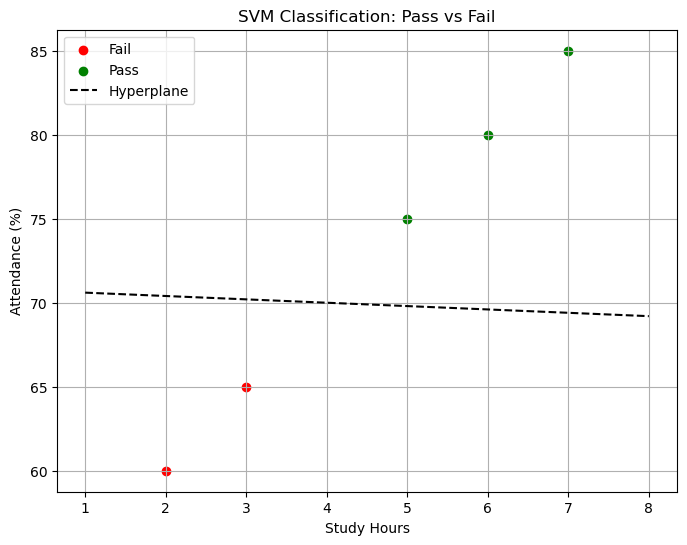

In [22]:
plt.figure(figsize=(8, 6)) # Separate data 
fail = df[df.iloc[:, 2] == 0] 
# Result 
pass_ = df[df.iloc[:, 2] == 1] 
# Fail points 
plt.scatter( fail.iloc[:, 0], # Study Hours 
             fail.iloc[:, 1], 
color="red", label="Fail" )
# Pass points 
plt.scatter( pass_.iloc[:, 0], pass_.iloc[:, 1], color="green", label="Pass" ) 
# Hyperplane
plt.plot(X_vals, y_vals, "k--", label="Hyperplane") 

# Predicted point (NUMPY ARRAY) plt.scatter( new_student.iloc[0, 0], new_student.iloc[0, 1], marker="*", s=250, label="Predicted Student" ) 
plt.xlabel("Study Hours") 
plt.ylabel("Attendance (%)") 
plt.title("SVM Classification: Pass vs Fail") 
plt.legend() 
plt.grid(True) 

plt.show()
